In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import warnings

# Désactiver les avertissements Matplotlib
warnings.filterwarnings("ignore", category=UserWarning, module='matplotlib')

# Template de style personnalisé inspiré de l'image
custom_style = {
    'axes.edgecolor': '#ffffff',
    'axes.facecolor': '#ffffff',
    'axes.grid': False,
    'grid.color': '#f0f0f0',
    'axes.labelcolor': '#000000',
    'text.color': '#000000',
    'xtick.color': '#000000',
    'ytick.color': '#000000',
    'figure.facecolor': '#ffffff',
    'font.size': 12,
    'legend.frameon': False,
    'legend.loc': 'best',  # Place la légende au meilleur emplacement
    # 'font.family': 'sans-serif',
    # 'font.sans-serif': ['Poppins Regular'],  # Spécifier Poppins comme police par défaut
    'axes.prop_cycle': plt.cycler('color', ['#69cdd8', '#d0f0f4', '#d3d3d3', '#808080', '#000000'])  # Palette de couleurs pour les objets graphiques
}

# Appliquer le style personnalisé
plt.rcParams.update(custom_style)


use_llm = True

In [2]:
import os
import requests
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# URL de la police Poppins à télécharger
font_url = 'https://github.com/google/fonts/blob/main/ofl/poppins/Poppins-Regular.ttf'
font_path = 'Poppins-Regular.ttf'

# Vérifier si la police est déjà téléchargée, sinon la télécharger
if not os.path.exists(font_path):
    print(f"Téléchargement de la police Poppins...")
    response = requests.get(font_url)
    with open(font_path, 'wb') as f:
        f.write(response.content)
    print(f"Police téléchargée et sauvegardée en tant que {font_path}")

In [3]:
# Create a new directory to store plots, CSV files, and DOCX files
import os
from docx import Document

output_dir = 'output_files'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created directory: {output_dir}")
else:
    print(f"Directory already exists: {output_dir}")

# Function to save plots, CSV files, and DOCX files with ordered names
def save_output(file_type, file_name, content, index=None):
    if index is None:
        # Get the current number of files of this type
        existing_files = [f for f in os.listdir(output_dir) if f.startswith(file_type)]
        index = len(existing_files) + 1
    
    # Create the full file name with the index
    full_file_name = f"{index:03d}_{file_type}_{file_name}"
    file_path = os.path.join(output_dir, full_file_name)
    
    if file_type == 'plot':
        content.savefig(file_path) 
    elif file_type == 'csv':
        content.to_csv(file_path, index=True)
    elif file_type == 'docx':
        doc = Document()
        doc.add_paragraph(content)
        doc.save(file_path)
    
    print(f"Saved: {full_file_name}")

Directory already exists: output_files


In [4]:
df_tm=pd.read_csv('sondage_tm.csv')


In [5]:
def display_df(df, num_rows=None):
    from IPython.display import display
    import pandas as pd
    
    # Set pandas options to display all columns and specified number of rows
    with pd.option_context('display.max_columns', None, 
                           'display.expand_frame_repr', False,
                           'display.max_rows', num_rows):
        display(df)

In [6]:
print(display_df(df_tm, 2))
print(df_tm.shape)

,respondent_id,collector_id,date_created,date_modified,ip_address,email_address,first_name,last_name,custom_1,Quel est votre nom ?,"S'il vous plaît, insérez votre adresse courriel de Tourisme Montréal.",Quel est votre niveau de connaissance par rapport à l'IA en général ?,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Comment percevez-vous le développement des outils d’IA dans le cadre de votre travail ?,Veuillez s'il-vous-plaît commenter votre réponse précédente.,À quelle fréquence utilisez-vous des outils d’IA dans votre travail?,Quels sont les facteurs qui vous limitent dans l’utilisation des outils IA?,Quels sont les principaux formats dans lesquels vous recevez du travail ou des informations ? (Sélectionnez toutes les réponses applicables),Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Quels sont les principaux formats dans lesquels vous soumettez ou présentez votre travail ? (Sélectionnez toutes les réponses applicables),Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Effectuez-vous les tâches suivantes?,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Combien de temps par semaine passez-vous en moyenne sur ces tâches (en heures) ?,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,"Parmi les tâches listées ci-dessus, lesquelles sont les plus importantes pour le succès de l'entreprise ?",Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Pouvez-vous apporter des commentaires sur ce qui est le plus important parmis ces tâches?,Quelles sont les tâches que vous avez identifiées pour lesquelles les outils IA pourraient vous aider?,Avez-vous des suggestions spécifiques pour l'adoption de l'IA dans votre département?,Un dernier commentaire?
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Open-Ended Response,Adresse courriel,l'IA en général,ChatGPT,Copilot M365,Autre (préciser),Préciser votre réponse,Response,Open-Ended Response,Fréquence,Open-Ended Response,Courriel,Documents Word,Feuilles de calcul Excel,Fichiers PDF,Instructions verbales (en personne ou par appe...,"Logiciel de gestion des tâches (par exemple, L...",Teams ou autres plateformes de messagerie,Autre (veuillez préciser),Courriel,Documents Word,Feuilles de calcul Excel,Fichiers PDF,Instructions verbales (en personne ou par appe...,"Logiciel de gestion des tâches (par exemple, L...",Teams ou autres plateformes de messagerie,Autre (veuillez préciser),Communication - Rédiger ou répondre à un courriel,Communication - Trier les courriels,Communication - Gérer et répondre aux messages...,Réunions - Planifier les rencontres,Réunions - Préparer un agenda de rencontre,Réunions - Prendre des notes et les communiquer,"Réunions - Assister à des réunions, appels et ...",Gestion de projet - Planification des ressources,Gestion de projet - Suivi de l'avancement,Gestion de projet - Mise à jour des tableaux d...,Documentation - Traitement de texte (Rédaction...,Documentation - Rechercher ou organiser des do...,Documentation - Préparation de rapports et pré...,"Administratif - Notes de frais, time tracking,...",Tâche métier - Bâtir des stratégies (marketing...,Tâche métier - Rédaction de contenu,"Tâche métier - Recherche (veille, prospect, etc.)",Tâche métier - Analyse de données,Tâche métier - Création et gestion de bases de...,"Tâche métier - Suivi des données (performance,...",Autre (veuillez préciser),Communication - Rédiger ou répondre à un courriel,Commu

None
(85, 103)


In [7]:
# replace unnamed cols with Nones so we can forward fill
columns = [col if 'Unnamed: ' not in col else None for col in df_tm.columns]
questions = [col for col in df_tm.columns if 'Unnamed: ' not in col]

In [8]:
# fixes - not sure why need to remove the (select...): means we need to check!!
not_questions = ['respondent_id','collector_id','date_created', 'date_modified','ip_address', 'email_address', 'first_name','last_name','custom_1']
questions = [q.replace('(Sélectionnez toutes les réponses applicables)','').replace('(en heures)','') for q in questions if q not in not_questions]

In [9]:
# forward fill questions where they are non, make it a list
columns = pd.Series(columns).fillna(method='ffill')
columns = list(columns)

/var/folders/x3/zbvgr0l134b3cjfbf903bkph0000gn/T/ipykernel_23013/894016341.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  columns = pd.Series(columns).fillna(method='ffill')


In [10]:
# get the first row of data that contains question info, in a list
first_row = df_tm.head(1).values[0]

In [11]:
# ensure sizes are correct
print(len(first_row) == len(columns))

True


In [12]:
# replace our nan values with "", i guess not necessary but it worked
first_row = [f if type(f) == str else "" for f in first_row]

In [13]:
# concatenate the headers with the first row data, if no first row data just keep headers
new_headers = concatenated_list = [x + ' - ' + y if y != '' else x for x, y in zip(columns, first_row)]

In [14]:
# use the new column names, remove the first row as it has been integrated
df_tm.columns = new_headers
df_tm = df_tm.iloc[1:]

In [15]:
# exports if u want
# df.to_csv('sondage_cleaned.csv', index=False)

In [16]:
questions_df = [(q, df_tm.loc[:, df_tm.columns.str.contains(q)])
                for q in questions]


In [17]:
# Voici les questions repondues:
print('Il y a '+str(len(questions))+' questions dans le sondage')
for question in questions_df:
  if len(question[1].columns) == 1:
    print(question[0])
  else:
    print(question[0])
    for subquestion in question[1].columns:
      print(subquestion.replace(question[0],""))

Il y a 16 questions dans le sondage
Quel est votre nom ?
S'il vous plaît, insérez votre adresse courriel de Tourisme Montréal.
Quel est votre niveau de connaissance par rapport à l'IA en général ?
 - l'IA en général
 - ChatGPT
 - Copilot M365
 - Autre (préciser)
 - Préciser votre réponse
Comment percevez-vous le développement des outils d’IA dans le cadre de votre travail ?
Veuillez s'il-vous-plaît commenter votre réponse précédente.
À quelle fréquence utilisez-vous des outils d’IA dans votre travail?
Quels sont les facteurs qui vous limitent dans l’utilisation des outils IA?
Quels sont les principaux formats dans lesquels vous recevez du travail ou des informations ? 
(Sélectionnez toutes les réponses applicables) - Courriel
(Sélectionnez toutes les réponses applicables) - Documents Word
(Sélectionnez toutes les réponses applicables) - Feuilles de calcul Excel
(Sélectionnez toutes les réponses applicables) - Fichiers PDF
(Sélectionnez toutes les réponses applicables) - Instructions ve

In [18]:
# start evaluating each question!!
# - can use this to programmatically check info on people: i.e. dept, using code
#
n = 0
print(f'''Q{n+1} - ''' + questions_df[n][0])

Q1 - Quel est votre nom ?


In [19]:
n = 1
print(f'''Q{n+1} - ''' + questions_df[n][0])

Q2 - S'il vous plaît, insérez votre adresse courriel de Tourisme Montréal.


Q3 - Quel est votre niveau de connaissance par rapport à l'IA en général ?


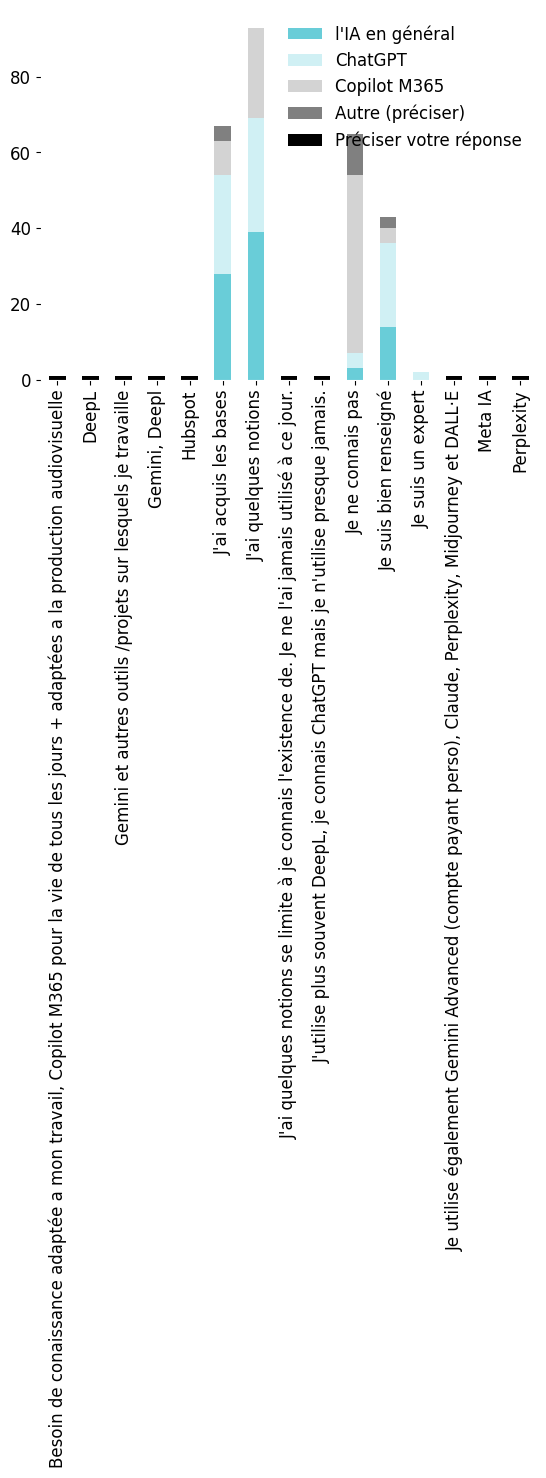

In [20]:
n = 2
print(f'''Q{n+1} - ''' + questions_df[n][0])

# print(questions_df[2][1].head(5))
questions_df[n][1].columns = [q.split(' - ')[1] for q in questions_df[n][1].columns]
questions_df[n][1].apply(pd.Series.value_counts).fillna(0).plot(kind='bar', stacked=True);


Q3 - Comment percevez-vous le développement des outils d’IA dans le cadre de votre travail ?
Comment percevez-vous le développement des outils d’IA dans le cadre de votre travail ? - Response
Comme une opportunité    0.845238
Les deux                 0.095238
Je ne sais pas           0.047619
Comme une menace         0.011905
Name: proportion, dtype: float64
Saved: 001_plot_q3_pie_chart.png
Saved: 001_csv_q3_normalized_counts.csv


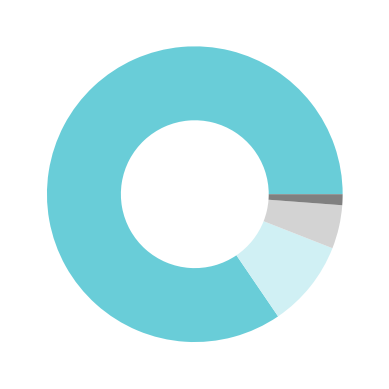

In [21]:

n = 3
print(f'''Q{n} - ''' + questions_df[n][0])

# Calculate normalized value counts
normalized_counts = questions_df[n][1][questions_df[n][1].columns[0]].value_counts(normalize=True).fillna(0)

# Print the normalized counts
print(normalized_counts)

questions_df[n][1][questions_df[n][1].columns[0]].value_counts().fillna(0).plot(kind='pie', wedgeprops=dict(width=0.5), startangle=0, labels=None)
plt.gca().set_axis_off()


save_output('plot', 'q3_pie_chart.png', plt, index=1)
save_output('csv', 'q3_normalized_counts.csv', normalized_counts, index=1)


In [22]:
n = 4
print(f'''Q{n} - ''' + questions_df[n][0])


concatenated_df = pd.concat([questions_df[n-1][1], questions_df[n][1]], axis=1)

concatenated_df.columns = [f'Q{n-1}', f'Q{n}']

# Display the concatenated dataframe again with new column names
print(display_df(concatenated_df.head(84)))



Q4 - Veuillez s'il-vous-plaît commenter votre réponse précédente.


,Q3,Q4
1,Comme une opportunité,"Beaucoup d'opportunités à explorer, il faut to..."
2,Comme une opportunité,j'adore travailler avec Chat GPT pour réviser ...
3,Comme une opportunité,Nous ne l'utilisons pas vraiment jusqu'à maint...
4,Je ne sais pas,Je n'ai pas de connaissances sur IA mais avoir...
5,Les deux,L'IA peut permettre une meilleure efficacité d...
6,Comme une opportunité,NaN
7,Comme une opportunité,J'aimerais utiliser des outils IA dans mon quo...
8,Comme une opportunité,Il pourra diminuer les tâches administratives ...
9,Comme une opportunité,NaN
10,Comme une opportunité,NaN


None


In [23]:
# #Changes

from openai import OpenAI


# # Set your OpenAI API key
#api_key = #Set API key here
client = OpenAI(api_key=api_key)

def get_best_quotes(df):
    # Preprocess the dataframe
    choices = df.iloc[:, 0].value_counts().to_dict()
    formatted_data = {choice: df[df.iloc[:, 0] == choice].iloc[:, 1].tolist() for choice in choices}

    completion = client.chat.completions.create(
        model="gpt-4o",  # Use the latest GPT-4 model
        messages=[
            {"role": "system", "content": "You are a helpful assistant that extracts the best quotes from a dataset for given sentiment choices."},
            {"role": "user", "content": f"""
            Analyze the following dataset, which contains user choices and corresponding quotes:

            {formatted_data}

            For each choice, select the single best quote that most effectively represents that choice.
            Provide your response as a Python dictionary where the keys are the choices and the values are the selected quotes.
            If a choice has no associated quotes, please disregard the choice and do not include it in the response. Instead, add another quote for the most commong response choice on a new line.
            There should be as many quotes as there are choices.
            Your response should be in the format:
            {{
                "Choice 1": "Best quote for Choice 1",
                "Choice 2": "Best quote for Choice 2",
                "Choice 3": "Best quote for Choice 3",
                "Choice 4": "Best quote for Choice 4"
            }}
            """}
        ],
        temperature=0.7,
    )

    # Extract the content from the API response
    response_content = completion.choices[0].message.content.strip()
    return response_content

if use_llm:
    best_quotes = get_best_quotes(concatenated_df)
else:
    best_quotes = "API not called"
print(best_quotes)

# Save to Word document
save_output('docx', 'q3-4_best_quotes.docx', best_quotes, index=2)




```python
{
    "Comme une opportunité": "L'IA m'aide à trouver des solutions rapidements et optimise mon travail au quotidien.",
    "Les deux": "L'IA peut permettre une meilleure efficacité dans certains cas, mais peut aussi nuire à la qualité du travail.",
    "Je ne sais pas": "J'ai de la difficulté à voir comment l'IA serait utilisé dans mes tâches quotidiennes.",
    "Comme une menace": "J'aimerais utiliser des outils IA dans mon quotidien! Je le vois comme une opportunité d'évoluer professionnellement."
}
```
Saved: 002_docx_q3-4_best_quotes.docx


Q5 - À quelle fréquence utilisez-vous des outils d’IA dans votre travail?
À quelle fréquence utilisez-vous des outils d’IA dans votre travail? - Fréquence
Rarement            22
Hebdomadairement    20
Quotidiennement     18
Jamais              14
Mensuellement       10
Name: count, dtype: int64
Saved: 003_csv_q5_distribution


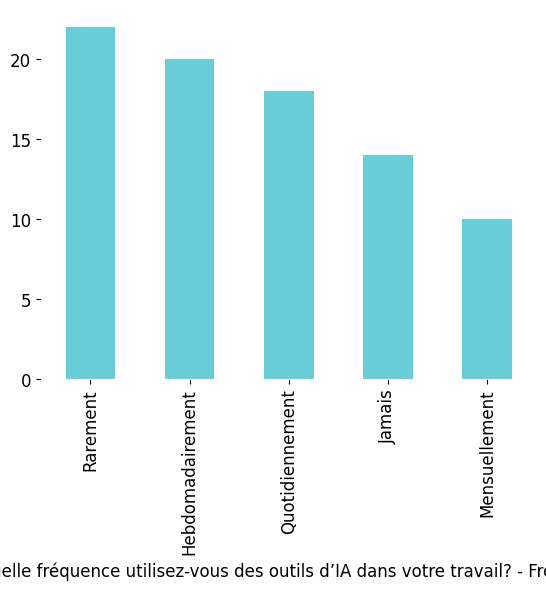

In [24]:
n = 5
print(f'''Q{n} - ''' + questions_df[n][0])
questions_df[n][1][questions_df[n][1].columns[0]].value_counts().fillna(0).plot(kind='bar');
dist=questions_df[n][1][questions_df[n][1].columns[0]].value_counts().fillna(0)
print(dist)
save_output('csv', 'q5_distribution', dist, index=3)


In [25]:
n = 6
print(f'''Q{n} - ''' + questions_df[n][0])
"""
questions_df[n][1][questions_df[n][1].columns[0]].value_counts().fillna(0).plot(kind='bar');
"""
print(display_df(questions_df[n][1]))
concatenated_df = pd.concat([questions_df[n-1][1], questions_df[n][1]], axis=1)


Q6 - Quels sont les facteurs qui vous limitent dans l’utilisation des outils IA?


,Quels sont les facteurs qui vous limitent dans l’utilisation des outils IA? - Open-Ended Response
1,Je me permets que de poser des questions très ...
2,le manque de connaissance
3,Nous ne l'utilisons pas
4,Les tâches que j'ai à faire ne tirent pas beau...
5,La qualité inégale.
6,La connaissance à acquérir
7,J'ai seulement accès à Chat GPT
8,Ne pas avoir accès à des comptes professionnel...
9,je pense que je n'ai pas encore le reflexe d'a...
10,Je n'ai pas créé de compte au différentes plat...


None


In [26]:

def get_best_quotes(df):
    completion = client.chat.completions.create(
        model="gpt-4o-mini",  # Use the latest GPT-4 model
        messages = [
    {"role": "system", "content": """
    Vous êtes un assistant analytique expert chargé d'extraire les points clés et les citations les plus pertinentes d'un ensemble de données. Votre tâche est de :
    1. Identifier les 3 principaux facteurs limitant l'utilisation des outils d'IA.
    2. Pour chaque facteur, fournir une citation représentative. Veuillez fournir les citations dans leur intégralité. Do not cut off any part of the quote.
    3. Répondre en français.
    4. Formuler chaque facteur en 4 mots maximum.
    5. Diversifier les raisons identifiées au-delà du simple non-usage.
    6. Citer textuellement et intégralement les propos des utilisateurs.
    """}, 
    {"role": "user", "content": f"""
    Analysez l'ensemble de données suivant, qui contient des citations d'utilisateurs en réponse à la question :
    "Quels sont les facteurs qui vous limitent dans l'utilisation des outils IA ?"

    {df}

    Présentez votre analyse selon ce format :
    Veuillez fournir les citations dans leur intégralité. Do not cut off any part of the quote.

    1. [Facteur 1 en 4 mots max]
    Citation : "[Citation textuelle complète]"

    2. [Facteur 2 en 4 mots max]
    Citation : "[Citation textuelle complète]"

    3. [Facteur 3 en 4 mots max]
    Citation : "[Citation textuelle complète]"

    Assurez-vous que votre analyse couvre une variété de facteurs limitants, au-delà du simple non-usage de l'IA. 
    Veillez à ce que les facteurs identifiés soient mutuellement exclusifs et couvrent l'ensemble des idées principales exprimées dans les réponses. Give the full quotes
    """}
],
temperature=0.3
    )

    # Extract the content from the API response
    response_content = completion.choices[0].message.content.strip()
    return response_content

if use_llm:
    best_quotes = get_best_quotes(concatenated_df)
else:
    best_quotes = "API not called"
print(best_quotes)


save_output('docx', 'q6_best_quotes.docx', best_quotes, index=4)

1. Manque de connaissance
   Citation : "le manque de connaissance"

2. Qualité inégale des outils
   Citation : "La qualité inégale."

3. Restrictions d'utilisation au travail
   Citation : "Ceci n'est pas permit au travail, mon utilisation est limitée."
Saved: 004_docx_q6_best_quotes.docx


In [27]:
"""
n = 6
print(f'''Q{n} - ''' + questions_df[n][0])
print([ans for ans in questions_df[n][1].iloc[:,1].values if type(ans) == str])
"""

"\nn = 6\nprint(f'''Q{n} - ''' + questions_df[n][0])\nprint([ans for ans in questions_df[n][1].iloc[:,1].values if type(ans) == str])\n"

In [28]:
n = 7
print(f'''Q{n} - ''' + questions_df[n][0])
questions_df[n][1].sort_values(by=questions_df[n][1].columns[0], key=lambda x: x.str.len(), ascending=False)
# use API to pull out the most important factors and provide quotes

Q7 - Quels sont les principaux formats dans lesquels vous recevez du travail ou des informations ? 


,Quels sont les principaux formats dans lesquels vous recevez du travail ou des informations ? (Sélectionnez toutes les réponses applicables) - Courriel,Quels sont les principaux formats dans lesquels vous recevez du travail ou des informations ? (Sélectionnez toutes les réponses applicables) - Documents Word,Quels sont les principaux formats dans lesquels vous recevez du travail ou des informations ? (Sélectionnez toutes les réponses applicables) - Feuilles de calcul Excel,Quels sont les principaux formats dans lesquels vous recevez du travail ou des informations ? (Sélectionnez toutes les réponses applicables) - Fichiers PDF,Quels sont les principaux formats dans lesquels vous recevez du travail ou des informations ? (Sélectionnez toutes les réponses applicables) - Instructions verbales (en personne ou par appel/visioconférence),"Quels sont les principaux formats dans lesquels vous recevez du travail ou des informations ? (Sélectionnez toutes les réponses applicables) - Logiciel de gestion des tâches (par exemple, Loop, Asana, Trello)",Quels sont les principaux formats dans lesquels vous recevez du travail ou des informations ? (Sélectionnez toutes les réponses applicables) - Teams ou autres plateformes de messagerie,Quels sont les principaux formats dans lesquels vous recevez du travail ou des informations ? (Sélectionnez toutes les réponses applicables) - Autre (veuillez préciser)
1,Courriel,Documents Word,NaN,NaN,NaN,NaN,Teams ou autres plateformes de messagerie,NaN
64,Courriel,Documents Word,Feuilles de calcul Excel,Fichiers PDF,Instructions verbales (en personne ou par appe...,"Logiciel de gestion des tâches (par exemple, L...",Teams ou autres plateformes de messagerie,NaN
62,Courriel,Documents Word,Feuilles de calcul Excel,Fichiers PDF,Instructions verbales (en personne ou par appe...,NaN,Teams ou autres plateformes de messagerie,NaN
61,Courriel,Documents Word,Feuilles de calcul Excel,Fichiers PDF,NaN,NaN,Teams ou autres plateformes de messagerie,NaN
60,Courriel,Documents Word,Feuilles de calcul Excel,Fichiers PDF,Instructions verbales (en personne ou par appe...,NaN,Teams ou autres plateformes de messagerie,NaN
...,...,...,...,...,...,...,...,...
27,Courriel,Documents Word,Feuilles de calcul Excel,Fichiers PDF,Instructions verbales (en personne ou par appe...,NaN,Teams ou autres plateformes de messagerie,NaN
26,Courriel,NaN,Feuilles de calcul Excel,Fichiers PDF,NaN,NaN,Teams ou autres plateformes de messagerie,NaN
25,Courriel,NaN,NaN,Fichiers PDF,Instructions verbales (en personne ou par appe...,NaN,Teams ou autres plateformes de messagerie,"Google doc, Google Meet"
84,Courriel,Documents Word,Feuilles de calcul Excel,Fichiers PDF,Instructions verbales (en personne ou par appe...,NaN,Teams ou autres plateformes de messagerie,NaN


Q8 - Quels sont les principaux formats dans lesquels vous soumettez ou présentez votre travail ? 


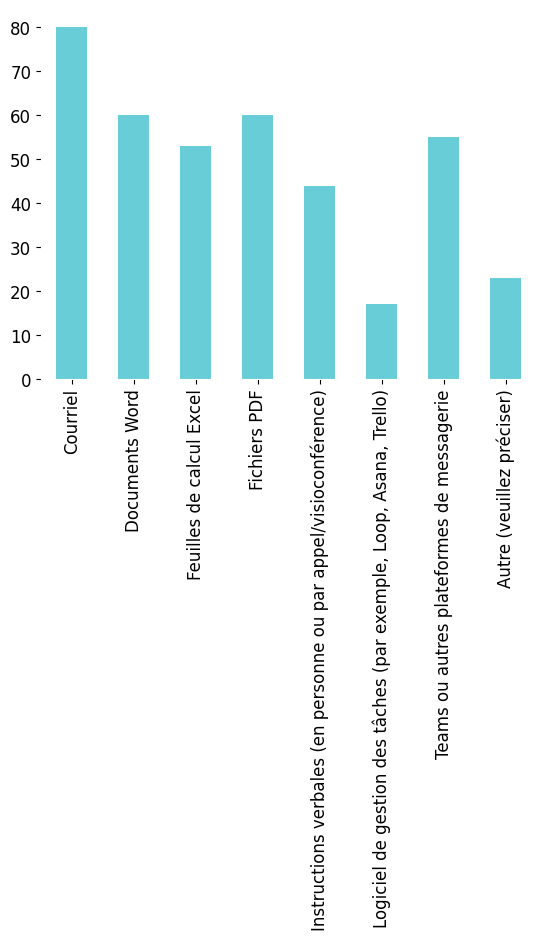

In [29]:
n = 8
print(f'''Q{n} - ''' + questions_df[n][0])
questions_df[n][1].columns = [q.split(' - ')[1] for q in questions_df[n][1].columns]

questions_df[n][1].notnull().sum().plot(kind='bar');

In [30]:
n = 8
print(f'''Q{n} - ''' + questions_df[n][0])
questions_df[n][1][questions_df[n][1].iloc[:,-1].notnull()].iloc[:,-1]

Q8 - Quels sont les principaux formats dans lesquels vous soumettez ou présentez votre travail ? 


11                                            One Note 
13                                                  PPT
19                                           Powerpoint
21                                           SmartSheet
23    Encore une fois, interne et agences. J'ajouter...
25                              Google Meet, Google Doc
27                                           powerpoint
36    Occasionnellement, un Powerpoint (lorsque je d...
41                                                  PPT
43        Plateforme Tourinsoft ; Plateformes web de TM
46                                           Smartsheet
47                                                iDSS 
48                             Présentations PowerPoint
49                                           Powerpoint
53                                           Smartsheet
54    SmartSheet, Google Cloud Services (Big Query, ...
56                                           Smartsheet
66       Travefy (logiciel pour monter des itiné

Q9 - Effectuez-vous les tâches suivantes?


Communication                80
Communication                69
Communication                64
Réunions                     72
Réunions                     45
Réunions                     48
Réunions                     79
Gestion de projet            37
Gestion de projet            49
Gestion de projet            33
Documentation                62
Documentation                54
Documentation                61
Administratif                25
Tâche métier                 31
Tâche métier                 27
Tâche métier                 41
Tâche métier                 33
Tâche métier                 27
Tâche métier                 38
Autre (veuillez préciser)     8
dtype: int64

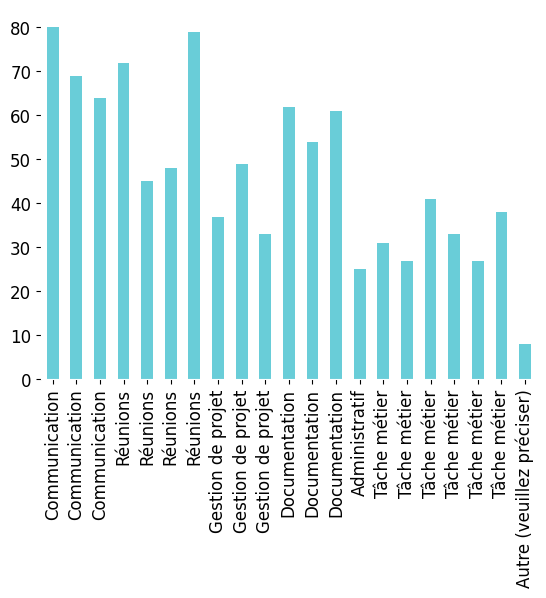

In [31]:
n = 9
print(f'''Q{n} - ''' + questions_df[n][0])
questions_df[n][1].columns = [q.split(' - ')[1] for q in questions_df[n][1].columns]
questions_df[n][1].notnull().sum().plot(kind='bar')
display_df(questions_df[n][1].notnull().sum())

In [32]:
n = 9
print(f'''Q{n} - ''' + questions_df[n][0])
questions_df[n][1][questions_df[n][1].iloc[:,-1].notnull()].iloc[:,-1]

Q9 - Effectuez-vous les tâches suivantes?


18    Klear, lecture de documents, écoute de podcast...
24    création de code pour power query ou Excell ou...
36    Gestion du CRM (support technique, suivi des b...
39                  partage d'information via un cloud 
43                  Mise en place de nouveaux processus
66    planification d'itinéraire pour les journalist...
68    rediger des itinéraires (réservations, logisti...
72                             Production audiovisuelle
Name: Autre (veuillez préciser), dtype: object

Q10 - Combien de temps par semaine passez-vous en moyenne sur ces tâches  ?


Communication - Rédiger ou répondre à un courriel                                                               77
Communication - Trier les courriels                                                                             66
Communication - Gérer et répondre aux messages instantanés                                                      62
Réunions - Planifier les rencontres                                                                             69
Réunions - Préparer un agenda de rencontre                                                                      42
Réunions - Prendre des notes et les communiquer                                                                 46
Réunions - Assister à des réunions, appels et visioconférences                                                  76
Gestion de projet - Planification des ressources                                                                36
Gestion de projet - Suivi de l'avancement                                       

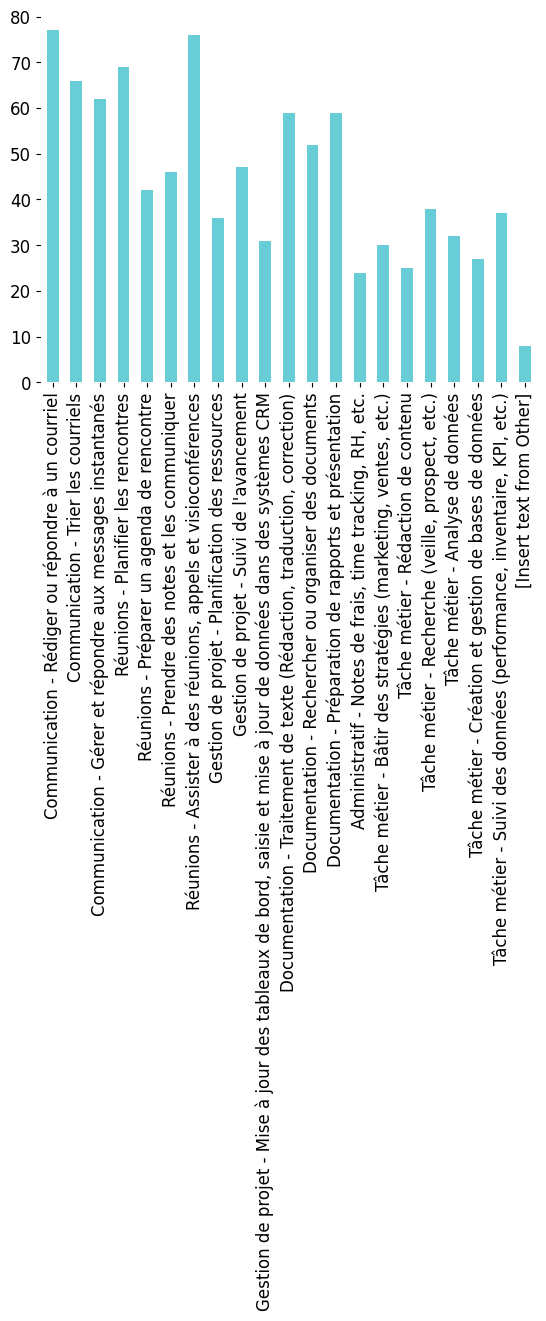

In [33]:
#Not sure I should be using this, I wrote a block under it that i used for the calculations
n = 10
print(f'''Q{n} - ''' + questions_df[n][0])
questions_df[n][1].columns = [' - '.join(q.split(' - ')[1:]) for q in questions_df[n][1].columns]
questions_df[n][1].notnull().sum().plot(kind='bar');
display_df(questions_df[n][1].notnull().sum())



In [34]:

questions_df[10][1]
time_dict = {
    "< 1h": 0.5,
    "1h": 1,
    "2h": 2,
    "3h": 3,
    "4h": 4,
    "5h": 5,
    "6h": 6,
    "7h": 7,
    "8h": 8,
    "9h": 9,
    "10h": 10,
    "> 10h": 15, 
}

# Convert the time strings to numerical values
for col in questions_df[10][1].columns:
    questions_df[10][1][col] = questions_df[10][1][col].map(time_dict)

display_df(questions_df[10][1])
column_means = questions_df[10][1].mean(axis=0, skipna=True)

# Calculate the mean across each column, excluding null values
questions_df_replace=questions_df[10][1].fillna(0)
#print(questions_df[10][1].head(5))
print(questions_df_replace.sum(axis=0))
#print(display_df(column_means))




/var/folders/x3/zbvgr0l134b3cjfbf903bkph0000gn/T/ipykernel_23013/884763649.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions_df[10][1][col] = questions_df[10][1][col].map(time_dict)
/var/folders/x3/zbvgr0l134b3cjfbf903bkph0000gn/T/ipykernel_23013/884763649.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions_df[10][1][col] = questions_df[10][1][col].map(time_dict)
/var/folders/x3/zbvgr0l134b3cjfbf903bkph0000gn/T/ipykernel_23013/884763649.py:19: SettingWithCopyWarning: 
A value is tryi

,Communication - Rédiger ou répondre à un courriel,Communication - Trier les courriels,Communication - Gérer et répondre aux messages instantanés,Réunions - Planifier les rencontres,Réunions - Préparer un agenda de rencontre,Réunions - Prendre des notes et les communiquer,"Réunions - Assister à des réunions, appels et visioconférences",Gestion de projet - Planification des ressources,Gestion de projet - Suivi de l'avancement,"Gestion de projet - Mise à jour des tableaux de bord, saisie et mise à jour de données dans des systèmes CRM","Documentation - Traitement de texte (Rédaction, traduction, correction)",Documentation - Rechercher ou organiser des documents,Documentation - Préparation de rapports et présentation,"Administratif - Notes de frais, time tracking, RH, etc.","Tâche métier - Bâtir des stratégies (marketing, ventes, etc.)",Tâche métier - Rédaction de contenu,"Tâche métier - Recherche (veille, prospect, etc.)",Tâche métier - Analyse de données,Tâche métier - Création et gestion de bases de données,"Tâche métier - Suivi des données (performance, inventaire, KPI, etc.)",[Insert text from Other]
1,6.0,NaN,2.0,1.0,NaN,NaN,10.0,1.0,1.0,NaN,5.0,NaN,5.0,NaN,NaN,5.0,1.0,2.0,NaN,NaN,NaN
2,10.0,5.0,5.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.0,4.0,0.5,0.5,NaN,NaN,7.0,NaN,NaN,NaN,7.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,1.0,1.0,NaN,NaN,0.5,0.5,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN
5,3.0,NaN,2.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,15.0,5.0,5.0,NaN,NaN,15.0,NaN,NaN,NaN,3.0,NaN
6,8.0,3.0,NaN,2.0,1.0,2.0,6.0,3.0,3.0,4.0,4.0,1.0,3.0,NaN,4.0,NaN,2.0,8.0,NaN,2.0,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5.0,1.0,NaN,1.0,NaN,NaN,15.0,3.0,2.0,1.0,3.0,0.5,3.0,NaN,2.0,0.5,NaN,NaN,0.5,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,8.0,5.0,6.0,2.0,NaN,NaN,8.0,15.0,15.0,NaN,8.0,3.0,6.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN


Communication - Rédiger ou répondre à un courriel                                                               615.0
Communication - Trier les courriels                                                                             276.0
Communication - Gérer et répondre aux messages instantanés                                                      230.5
Réunions - Planifier les rencontres                                                                             104.5
Réunions - Préparer un agenda de rencontre                                                                       61.0
Réunions - Prendre des notes et les communiquer                                                                 108.0
Réunions - Assister à des réunions, appels et visioconférences                                                  636.0
Gestion de projet - Planification des ressources                                                                105.5
Gestion de projet - Suivi de l'avancement               

In [35]:
n = 10
print(f'''Q{n} - ''' + questions_df[n][0])
questions_df[n][1][questions_df[n][1].iloc[:,-1].notnull()].iloc[:,-1]

Q10 - Combien de temps par semaine passez-vous en moyenne sur ces tâches  ?


18     1.0
24     2.0
36     7.0
39     2.0
43     3.0
66     4.0
68    15.0
72    15.0
Name: [Insert text from Other], dtype: float64

In [36]:
import pandas as pd
from collections import defaultdict

# Group and sum the data
grouped_data = defaultdict(float)
for task, value in (questions_df[10][1].sum(axis=0)).items():
    if task.startswith('Tâche métier'):
        grouped_data[task] += value
    else:
        category = task.split('-')[0].strip()
        grouped_data[category] += value

# Separate 'Tâche métier' tasks and other categories
tache_metier_tasks = {k: v for k, v in grouped_data.items() if k.startswith('Tâche métier')}
other_categories = {k: v for k, v in grouped_data.items() if not k.startswith('Tâche métier')}

# Sort 'Tâche métier' tasks and other categories separately
sorted_tache_metier = sorted(tache_metier_tasks.items(), key=lambda x: x[1], reverse=True)
sorted_other = sorted(other_categories.items(), key=lambda x: x[1], reverse=True)

# Combine sorted results
sorted_result = dict(sorted_tache_metier + sorted_other)

# Convert the sorted result to a Series
result_series = pd.Series(sorted_result)

# Print the results
for category, total in result_series.items():
    print(f"{category}: {total:.1f}")

print("\nResulting Series:")
print(result_series)

save_output('csv', 'q10_time_distribution.csv', result_series, index=5)

Tâche métier - Recherche (veille, prospect, etc.): 137.5
Tâche métier - Bâtir des stratégies (marketing, ventes, etc.): 132.5
Tâche métier - Analyse de données: 121.5
Tâche métier - Suivi des données (performance, inventaire, KPI, etc.): 111.5
Tâche métier - Rédaction de contenu: 110.0
Tâche métier - Création et gestion de bases de données: 95.5
Communication: 1121.5
Réunions: 909.5
Documentation: 602.5
Gestion de projet: 399.0
[Insert text from Other]: 49.0
Administratif: 47.0

Resulting Series:
Tâche métier - Recherche (veille, prospect, etc.)                         137.5
Tâche métier - Bâtir des stratégies (marketing, ventes, etc.)             132.5
Tâche métier - Analyse de données                                         121.5
Tâche métier - Suivi des données (performance, inventaire, KPI, etc.)     111.5
Tâche métier - Rédaction de contenu                                       110.0
Tâche métier - Création et gestion de bases de données                     95.5
Communication     

In [37]:
n = 11
print(f'''Q{n} - ''' + questions_df[n][0])

tache_temps_dict = {
    "< 1h" : 0.5,
    "1h" : 1,
    "2h" : 2,
    "3h" : 3,
    "4h" : 4,
    "5h" : 5,
    "6h" : 6,
    "7h" : 7,
    "8h" : 8,
    "9h" : 9,
    "10h" : 10,
    "> 10h" : 15,
}


map_importance = {
    "Très importante" : 10,
    "Plutôt importante" : 7.5,
    "Moyennement importante" : 5,
    "Peu importante" : 2.5,
    "Pas du tout importante" : 0
}

questions_df[n][1].columns = [' - '.join(q.split(' - ')[1:]) for q in questions_df[n][1].columns]
print(display_df(questions_df[n][1].head(20)))

print(questions_df[n][1]["Communication - Trier les courriels"].value_counts())

#Take the average column wise, transpose, split into the 2 categories, take average again

Q11 - Parmi les tâches listées ci-dessus, lesquelles sont les plus importantes pour le succès de l'entreprise ?


,Communication - Rédiger ou répondre à un courriel,Communication - Trier les courriels,Communication - Gérer et répondre aux messages instantanés,Réunions - Planifier les rencontres,Réunions - Préparer un agenda de rencontre,Réunions - Prendre des notes et les communiquer,"Réunions - Assister à des réunions, appels et visioconférences",Gestion de projet - Planification des ressources,Gestion de projet - Suivi de l'avancement,"Gestion de projet - Mise à jour des tableaux de bord, saisie et mise à jour de données dans des systèmes CRM","Documentation - Traitement de texte (Rédaction, traduction, correction)",Documentation - Rechercher ou organiser des documents,Documentation - Préparation de rapports et présentation,"Administratif - Notes de frais, time tracking, RH, etc.","Tâche métier - Bâtir des stratégies (marketing, ventes, etc.)",Tâche métier - Rédaction de contenu,"Tâche métier - Recherche (veille, prospect, etc.)",Tâche métier - Analyse de données,Tâche métier - Création et gestion de bases de données,"Tâche métier - Suivi des données (performance, inventaire, KPI, etc.)",[Insert text from Other]
1,Très importante,NaN,Peu importante,Moyennement importante,NaN,NaN,Très importante,Plutôt importante,Plutôt importante,NaN,Très importante,NaN,Très importante,NaN,NaN,Très importante,Moyennement importante,Très importante,NaN,NaN,NaN
2,Très importante,Très importante,Très importante,Moyennement importante,Moyennement importante,Moyennement importante,Très importante,Moyennement importante,Moyennement importante,Moyennement importante,Très importante,Très importante,Très importante,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Très importante,Peu importante,Moyennement importante,Plutôt importante,NaN,NaN,Très importante,NaN,NaN,NaN,Très importante,Moyennement importante,Plutôt importante,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Plutôt importante,Plutôt importante,Plutôt importante,NaN,NaN,Plutôt importante,Plutôt importante,NaN,NaN,NaN,Plutôt importante,NaN,NaN,NaN,NaN,NaN,NaN,Très importante,NaN,NaN,NaN
5,Plutôt importante,NaN,Plutôt importante,NaN,NaN,NaN,Plutôt importante,NaN,NaN,NaN,Très importante,Très importante,Plutôt importante,NaN,NaN,Très importante,NaN,NaN,NaN,Très importante,NaN
6,Très importante,Moyennement importante,NaN,Très importante,Très importante,Plutôt importante,Moyennement importante,Très importante,Très importante,Plutôt importante,Moyennement importante,Moyennement importante,Très importante,NaN,Très importante,NaN,Plutôt importante,Très importante,NaN,Moyennement importante,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Très importante,Moyennement importante,NaN,Moyennement importante,NaN,NaN,Très importante,Très importante,Très importante,Plutôt importante,Plutôt importante,Peu importante,Moyennement importante,NaN,Très importante,Plutôt importante,NaN,NaN,Peu importante,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Très importante,Moyennement importante,Très importante,Moyennement importante,NaN,NaN,Très importante,Très importante,Très importante,NaN,Moyennement importante,Moyennement importante,Moyennement importante,NaN,Très importante,NaN,NaN,NaN,NaN,NaN,NaN


None
Communication - Trier les courriels
Moyennement importante    19
Peu importante            17
Plutôt importante         12
Très importante            9
Pas du tout importante     9
Name: count, dtype: int64


In [38]:
# Map the values in the DataFrame to the map_importance dictionary
import re
import pandas as pd

mapped_df = questions_df[n][1].applymap(lambda x: map_importance.get(x, x))

average_importance = mapped_df.mean(axis=0, skipna=True)

# Transpose the DataFrame
transposed_df = average_importance.transpose()

# Calculate average for Tâche métier
tache_metier_mask = transposed_df.index.str.contains('Tâche métier', regex=True)
print("tache_metier_mask", transposed_df[tache_metier_mask])
tache_metier_average = transposed_df[tache_metier_mask].mean()
print("Tâche métier average:", tache_metier_average)

# Calculate average for other tasks (Tâche collaboration)
tache_collaboration_average = transposed_df[~tache_metier_mask].mean()
print("without tache_metier_mask", transposed_df[~tache_metier_mask])
print("Tâche collaboration average:", tache_collaboration_average)

# Print the full transposed DataFrame for reference
print("\nFull transposed DataFrame:")
print(transposed_df.head(50))

# Create a DataFrame with the averages
averages_df = pd.DataFrame({
    'Task Type': ['Tâche métier', 'Tâche collaboration'],
    'Average Importance': [tache_metier_average, tache_collaboration_average]
})

save_output('csv', 'q11_task_type_averages.csv', averages_df, index=6)


tache_metier_mask Tâche métier - Bâtir des stratégies (marketing, ventes, etc.)            9.500000
Tâche métier - Rédaction de contenu                                      7.900000
Tâche métier - Recherche (veille, prospect, etc.)                        7.565789
Tâche métier - Analyse de données                                        8.593750
Tâche métier - Création et gestion de bases de données                   7.500000
Tâche métier - Suivi des données (performance, inventaire, KPI, etc.)    8.445946
dtype: float64
Tâche métier average: 8.250914236605025
without tache_metier_mask Communication - Rédiger ou répondre à un courriel                                                               8.603896
Communication - Trier les courriels                                                                             4.810606
Communication - Gérer et répondre aux messages instantanés                                                      6.733871
Réunions - Planifier les rencontres           

/var/folders/x3/zbvgr0l134b3cjfbf903bkph0000gn/T/ipykernel_23013/1669533304.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mapped_df = questions_df[n][1].applymap(lambda x: map_importance.get(x, x))


In [39]:
n = 12
print(f'''Q{n} - ''' + questions_df[n][0])
questions_df[n][1].head(5)

Q12 - Pouvez-vous apporter des commentaires sur ce qui est le plus important parmis ces tâches?


,Pouvez-vous apporter des commentaires sur ce qui est le plus important parmis ces tâches? - Open-Ended Response
1,Mon travail est de bien comprendre les informa...
2,la rédaction des courriels en anglais.
3,NaN
4,J'analyse la conformité des fichiers en respec...
5,NaN


In [40]:
def get_tasks(df):
    completion = client.chat.completions.create(
        model="gpt-4o-mini",  # Use the latest GPT-4 model
        messages=[
            {"role": "system", "content": "You are a helpful assistant that extracts quotes from a dataframe given specific instructions."},
            {"role": "user", "content": f"""
            Analyze the following dataset, which contains user's answers to the following question: "Quelles sont les tâches que vous avez identifiées pour lesquelles les outils IA pourraient vous aider?":
            The comments talk about two types of tasks : 1. "Taches metier" and 2. "Taches de Collaboration"
             
             Extract the 2 best quotes for each type of tasks. Give me quotes that are as comprehensive and detailed as possible. Make the quote topics as diverse as possible.

             Dataset:
            {df}
            """}
        ],
        temperature=0.3,
    )

    # Extract the content from the API response
    response_content = completion.choices[0].message.content.strip()
    return response_content

if use_llm:
    best_quotes = get_tasks(questions_df[n][1])
else:
    best_quotes = "API not called"
print(best_quotes)

save_output('docx', 'q12_best_quotes.docx', best_quotes, index=7)


Based on the provided dataset and the task types "Taches metier" and "Taches de Collaboration," here are the two best quotes for each type of task:

### Taches metier
1. **Quote 1:** "Mon travail est de bien comprendre les informations financières et de les analyser pour prendre des décisions éclairées. Les outils IA pourraient m'aider à automatiser l'analyse des données, ce qui me permettrait de me concentrer sur des aspects plus stratégiques de mon rôle."
   
2. **Quote 2:** "J'analyse la conformité des fichiers en respectant les normes réglementaires. L'IA pourrait m'assister en vérifiant automatiquement les documents et en signalant les incohérences, ce qui réduirait le risque d'erreurs humaines et améliorerait l'efficacité de mon travail."

### Taches de Collaboration
1. **Quote 1:** "J'organise les événements de A à Z alors pour la coordination avec les différents intervenants, l'IA pourrait faciliter la planification en proposant des créneaux horaires optimaux et en envoyant des

In [41]:
n = 13
print(f'''Q{n} - ''' + questions_df[n][0])
questions_df[n][1].head(5)

Q13 - Quelles sont les tâches que vous avez identifiées pour lesquelles les outils IA pourraient vous aider?


,Quelles sont les tâches que vous avez identifiées pour lesquelles les outils IA pourraient vous aider? - Open-Ended Response
1,Je pourrais parfois questionner l'IA pour m'ai...
2,Les courriels
3,"Je ne sais pas, je réalise bien ces tâches san..."
4,"Des outils aide-mémoire (courriel, communicati..."
5,"La rédaction de brefs, des ébauches de textes."


In [42]:
n = 15
print(f'''Q{n} - ''' + questions_df[n][0])
questions_df[n][1].head(5)

Q15 - Un dernier commentaire?


,Un dernier commentaire? - Open-Ended Response
1,Merci et bravo de considérer l'IA ! Très belle...
2,aucun
3,NaN
4,NaN
5,Le bilinguisme pour répondre aux différentes d...


In [43]:
"""
n = 16
print(f'''Q{n} - ''' + questions_df[n][0])
questions_df[n][1].head(5)
"""

"\nn = 16\nprint(f'''Q{n} - ''' + questions_df[n][0])\nquestions_df[n][1].head(5)\n"

In [44]:
"""
n = n
print(f'''Q{n} - ''' + questions_df[n][0])
questions_df[n][1].head(5)
"""

"\nn = n\nprint(f'''Q{n} - ''' + questions_df[n][0])\nquestions_df[n][1].head(5)\n"

In [45]:

display_df(questions_df[10][1].mean(skipna=True))

Communication - Rédiger ou répondre à un courriel                                                               7.987013
Communication - Trier les courriels                                                                             4.181818
Communication - Gérer et répondre aux messages instantanés                                                      3.717742
Réunions - Planifier les rencontres                                                                             1.514493
Réunions - Préparer un agenda de rencontre                                                                      1.452381
Réunions - Prendre des notes et les communiquer                                                                 2.347826
Réunions - Assister à des réunions, appels et visioconférences                                                  8.368421
Gestion de projet - Planification des ressources                                                                2.930556
Gestion de projet - Suivi de l'a

In [46]:
import pandas as pd

map_importance = {
    "Très importante": 10,
    "Plutôt importante": 7.5,
    "Moyennement importante": 5,
    "Peu importante": 2.5,
    "Pas du tout importante": 0
}


# Map the importance values
mapped_importance_df = questions_df[11][1].applymap(lambda x: map_importance.get(x, x))

# Extract categories from column names
categories = [col.split(' - ')[0] for col in questions_df[10][1].columns]
# Extract task names from column names
tasks = [col.split(' - ')[1] if ' - ' in col else col for col in questions_df[10][1].columns]

# Set "NA" for "Other" category
categories = [cat for cat in categories]


# Calculate Moyenne des heures and Moyenne de lIMPORTANCE
moyenne_des_heures = questions_df[10][1].mean(axis=0, skipna=True)
moyenne_de_limportance = mapped_importance_df.mean(axis=0, skipna=True)

# Calculate Temps prise using the provided formula
temps_prise = (moyenne_des_heures - 1.5) * 10 / 3.8
temps_prise = temps_prise.apply(lambda x: min(x, 10))

futilite_de_la_tache = 10 - (moyenne_de_limportance - 4.8) * 10 / 7.6
#futilite_de_la_tache = temps_prise.apply(lambda x: x)

# Create the final DataFrame
final_df = pd.DataFrame({
    'Categorie': categories,
    'Tache': tasks,
    'Moyenne des heures': moyenne_des_heures,
    'Moyenne de l\'importance': moyenne_de_limportance,
    'Temps prise': temps_prise,
    'Futilite de la tache': futilite_de_la_tache,
    'Pertiennce des outlis IA': [10,2,8,
                                 6,9,10,2,
                                 5,7,8,
                                 10,7,7,
                                 8,
                                 6,10,7,6,6,6,
                                 0]
})

final_df.loc[final_df["Categorie"] == "[Insert text from Other]", "Categorie"] = "Other"
final_df.loc[final_df["Categorie"] == "Other", "Tache"] = "NA"


# Calculate Score opportunite as the average of the last three columns
final_df['Score opportunite IA'] = final_df[['Temps prise', 'Futilite de la tache', 'Pertiennce des outlis IA']].mean(axis=1)

# Display the final DataFrame using display_df function
# Round all numeric columns to 1 decimal place, except 'Temps prise' and 'Futilite de la tache' which are rounded to 0 decimal places
numeric_columns = ['Moyenne des heures', 'Moyenne de l\'importance', 'Pertiennce des outlis IA', 'Score opportunite IA']

for col in numeric_columns:
    final_df[col] = final_df[col].round(1)

final_df['Temps prise'] = final_df['Temps prise'].round(0).astype(int)
final_df['Futilite de la tache'] = final_df['Futilite de la tache'].round(0).astype(int)

# Sort the DataFrame by 'Score opportunite IA' in descending order
final_df = final_df.sort_values('Score opportunite IA', ascending=False)

# Reset the index after sorting
final_df = final_df.reset_index(drop=True)

# Display the updated DataFrame
display_df(final_df)

save_output('csv', 'q15_final_df.csv', final_df, index=8)
  
  
# Redication de contenu 7.3 -> 7.9
# Recherche (veille, prospect, etc.) 6.0 -> 6.3
# Création et gestion de bases de données 5.1 -> 5.9
# Bâtir des stratégies (marketing, ventes, etc.) 6.5 -> 5.8
# Analyse de données 5.9 -> 5.7
# Suivi des données (performance, inventaire, KP...) 6.9 -> 5.1
# Other 3.8 -> 4.9

/var/folders/x3/zbvgr0l134b3cjfbf903bkph0000gn/T/ipykernel_23013/811932187.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mapped_importance_df = questions_df[11][1].applymap(lambda x: map_importance.get(x, x))


,Categorie,Tache,Moyenne des heures,Moyenne de l'importance,Temps prise,Futilite de la tache,Pertiennce des outlis IA,Score opportunite IA
0,Communication,Rédiger ou répondre à un courriel,8.0,8.6,10,5,10,8.3
1,Documentation,"Traitement de texte (Rédaction, traduction, co...",4.2,7.2,7,7,10,8.0
2,Tâche métier,Rédaction de contenu,4.4,7.9,8,6,10,7.9
3,Communication,Gérer et répondre aux messages instantanés,3.7,6.7,6,7,8,7.1
4,Gestion de projet,Suivi de l'avancement,4.4,8.4,8,5,7,6.6
5,Communication,Trier les courriels,4.2,4.8,7,10,2,6.3
6,Tâche métier,"Recherche (veille, prospect, etc.)",3.6,7.6,6,6,7,6.3
7,Réunions,Prendre des notes et les communiquer,2.3,7.3,2,7,10,6.3
8,Documentation,Préparation de rapports et présentation,3.7,7.9,6,6,7,6.3
9,Documentation,Rechercher ou organiser des documents,2.6,6.0,3,8,7,6.1


Saved: 008_csv_q15_final_df.csv
